<a href="https://colab.research.google.com/github/Tbharvesh/DeepLearningProject/blob/main/Copy_of_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# !unzip -q dataset.zip
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train = ImageDataGenerator(rescale=1/255,zoom_range=0.2,shear_range=0.2,horizontal_flip=0.2,vertical_flip=0.2,rotation_range=0.2)
test = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/train",
                                          target_size = (224, 224),
                                          batch_size = 10)

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/test",
                                          target_size= (224, 224),
                                          batch_size = 10 )


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
print(train_dataset.class_indices)
print(train_dataset.classes)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


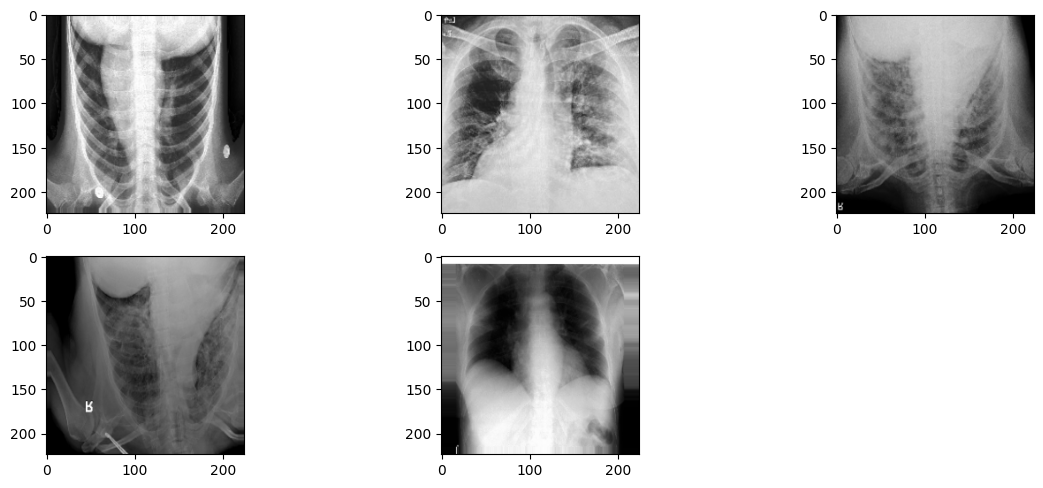

In [6]:
plt.figure(figsize=(12, 12))
for i in range(0, 5):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_dataset:
        image = X_batch[0]  #First img is taken from every batch
        plt.imshow(image)
        # plt.title(str(label.numpy()))
        break
plt.tight_layout()
plt.show()

In [7]:
num_train =20
num_validation =20
epochs =100
batch_size= 32

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, 256, 256)
else:
    input_shape=(256,256,3)

In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Layers of CNN Model


1.   Convolutional
2.   ReLu
3.   Pooling
4.   Dense





In [10]:

model0=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])
# model0 =Sequential()
# # model0.add(Dense(10,input_shape=(784,),name='dense_layer',activation='softmax'))
# model0.add(Conv2D(64,(3,3),input_shape=input_shape))

# model0.add(Activation('relu'))
# model0.add(MaxPooling2D(pool_size=(2,2)))
# model0.add(Conv2D(32,(3,3),activation = 'relu'))
# model0.add(MaxPooling2D(pool_size=(2,2)))
# model0.add(Conv2D(32,(3,3),activation = 'relu'))
# model0.add(Flatten())  #Multidim arr--->1D
# model0.add(Dense(64))
# # model0.add(Dense(units = 128, activation = 'relu'))
# model0.add(Dense(64,activation = 'relu'))
# model0.add(Dense(units = 3, activation = 'softmax'))
# model0.summary()

## Compiling the basic CNN model

In [11]:
model0.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

## Fit the Model

In [12]:
# augmented_train_dataset_repeated = augmented_train_dataset.repeat()
# val_dataset_repeated = val_dataset.repeat()
# training = model0.fit(train_dataset,
#                    steps_per_epoch=num_train,epochs=epochs)

In [13]:
history=model0.fit(train_dataset,
                  epochs=epochs,
                  steps_per_epoch=num_train,
                  validation_data=test_dataset)

Epoch 1/100
20/20 [==============================] - 101s 5s/step - loss: 1.4025 - accuracy: 0.4974 - val_loss: 1.2488 - val_accuracy: 0.3939
Epoch 2/100
20/20 [==============================] - 19s 930ms/step - loss: 0.9391 - accuracy: 0.6178 - val_loss: 0.7652 - val_accuracy: 0.6212
Epoch 3/100
20/20 [==============================] - 10s 482ms/step - loss: 0.7935 - accuracy: 0.6283 - val_loss: 0.7005 - val_accuracy: 0.7121
Epoch 4/100
20/20 [==============================] - 10s 505ms/step - loss: 0.7274 - accuracy: 0.7150 - val_loss: 1.0449 - val_accuracy: 0.6364
Epoch 5/100
20/20 [==============================] - 7s 389ms/step - loss: 0.8394 - accuracy: 0.6387 - val_loss: 0.7346 - val_accuracy: 0.6667
Epoch 6/100
20/20 [==============================] - 7s 371ms/step - loss: 0.6110 - accuracy: 0.7539 - val_loss: 0.5530 - val_accuracy: 0.7424
Epoch 7/100
20/20 [==============================] - 8s 413ms/step - loss: 0.6200 - accuracy: 0.7644 - val_loss: 0.5529 - val_accuracy: 0.75

## Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


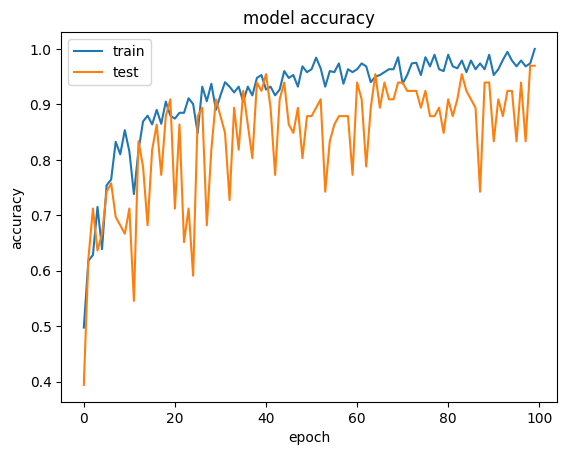

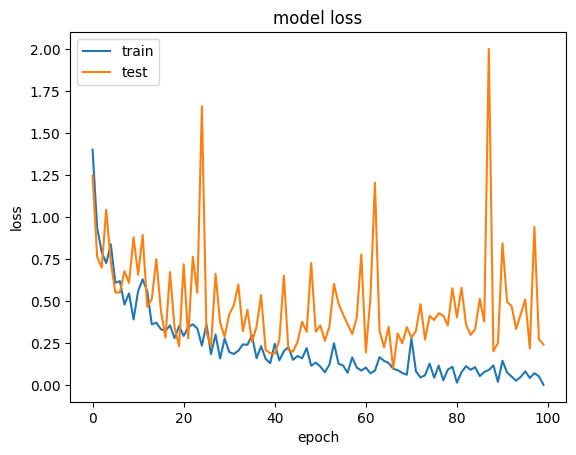

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(history.history.keys())
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("Val accuracy :",history.history['val_accuracy'][-1] * 100,"%")

Val accuracy : 96.96969985961914 %


In [39]:
d={0:'Covid',1:'Normal',2:'Pnemonia'}

(224, 224, 3)


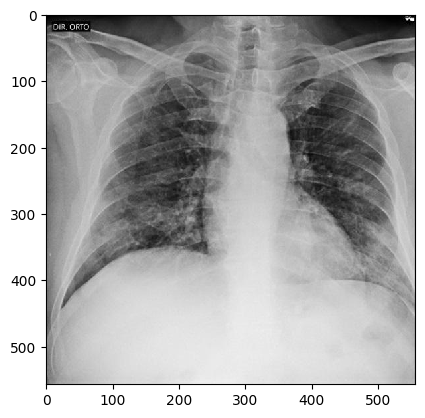

(1, 224, 224, 3)

In [26]:
import cv2
import numpy as np
img = cv2.imread('/content/drive/MyDrive/Covid19-dataset/test/Covid/COVID-00012.jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
print(img_array.shape)
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Covid/COVID-00012.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

img_array = img_array.reshape(1,224,224,3)
img_array.shape

In [40]:
a=model0.predict(img_array)
indices = a.argmax()
indices
print("Predicted class for the above image is: ",d[indices])

1/1 [==============================] - 0s 37ms/step
Predicted class for the above image is:  Covid


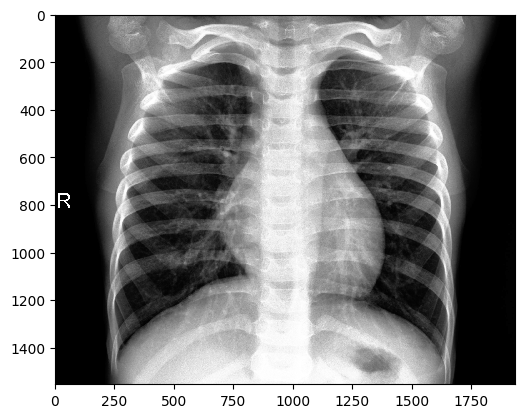

(1, 224, 224, 3)

In [43]:
img2 = cv2.imread('/content/drive/MyDrive/Covid19-dataset/test/Normal/0119.jpeg')
img2 = cv2.resize(img2,(224,224))
img2_array = np.array(img2)

from tensorflow.keras.preprocessing import image
img2 = image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Normal/0119.jpeg')
plt.imshow(img2,interpolation='nearest')
plt.show()

img2_array = img2_array.reshape(1,224,224,3)
img2_array.shape

In [41]:
a=model0.predict(img2_array)
indices = a.argmax()
indices
print("Predicted class for the above image is: ",d[indices])

1/1 [==============================] - 0s 17ms/step
Predicted class for the above image is:  Normal


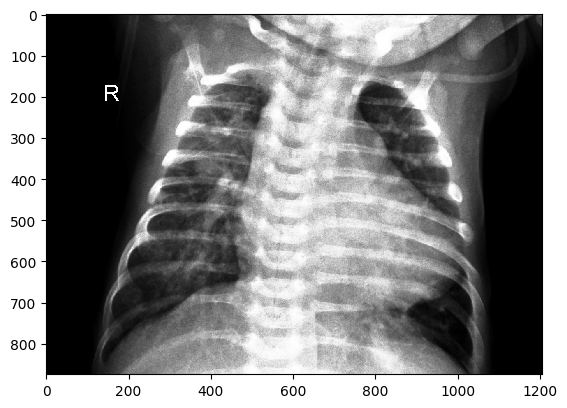

(1, 224, 224, 3)

In [42]:
img3 = cv2.imread('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0103.jpeg')
img3 = cv2.resize(img3,(224,224))
img3_array = np.array(img3)

img3 = image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0103.jpeg')
plt.imshow(img3,interpolation='nearest')
plt.show()

img3_array = img3_array.reshape(1,224,224,3)
img3_array.shape

In [44]:
a=model0.predict(img3_array)
indices = a.argmax()
indices
print("Predicted class for the above image is: ",d[indices])

1/1 [==============================] - 0s 18ms/step
Predicted class for the above image is:  Pnemonia
